# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOOF results from the MEG Data, explored on a single subject. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. Each subject data was ultimately project to a template anatomy with 7500 vertices. 

In [20]:
%matplotlib inline

# Import custom code from module om
from om.meg.single import MegSubj           # Import meg code for Single Subject
from om.meg.single import print_corrs_mat
from om.plts.meg import *                   # Import plots for meg
from om.core.db import OMDB
from om.core.osc import Osc

In [21]:
# Set database object - a basic class that stores all paths for the project
db = OMDB()

In [22]:
# Check what data is available
dat_source = 'HCP'
sub_nums, source = db.check_dat_files('fooof', dat_source)

### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [23]:
# Check what saved pickle files are available
meg_files = db.check_res_files('meg')


Number of files available: 0

Files available: 




In [24]:
## Import an individual subject of FOOF PSD results

# Set subject number to load
subj = sub_nums[4]

# Set up oscillation band definition
osc = Osc(default=True)

# Initialize data object and load data
meg_subj = MegSubj(db, dat_source, osc)
meg_subj.import_fooof(subj, get_demo=True, load_type='json')

In [27]:
# Use oscillatory bands to find oscillations per band per vertex
meg_subj.osc_bands_vertex()

In [28]:
# This data can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.set_foof_viz()

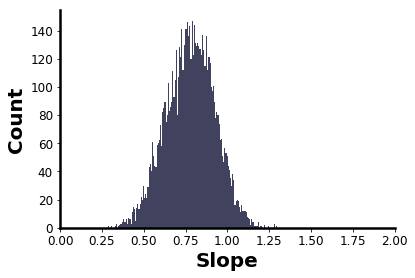

In [29]:
# Plot the distribution of slopes, as computed by FOOOF
plot_slopes(meg_subj.slopes, meg_subj.comment, save_out=False)

In [30]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Number of oscillations: 34038


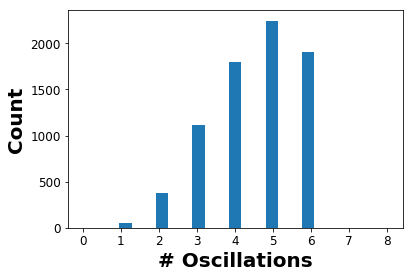

In [31]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.n_oscs))
plot_hist_count(meg_subj.osc_count)

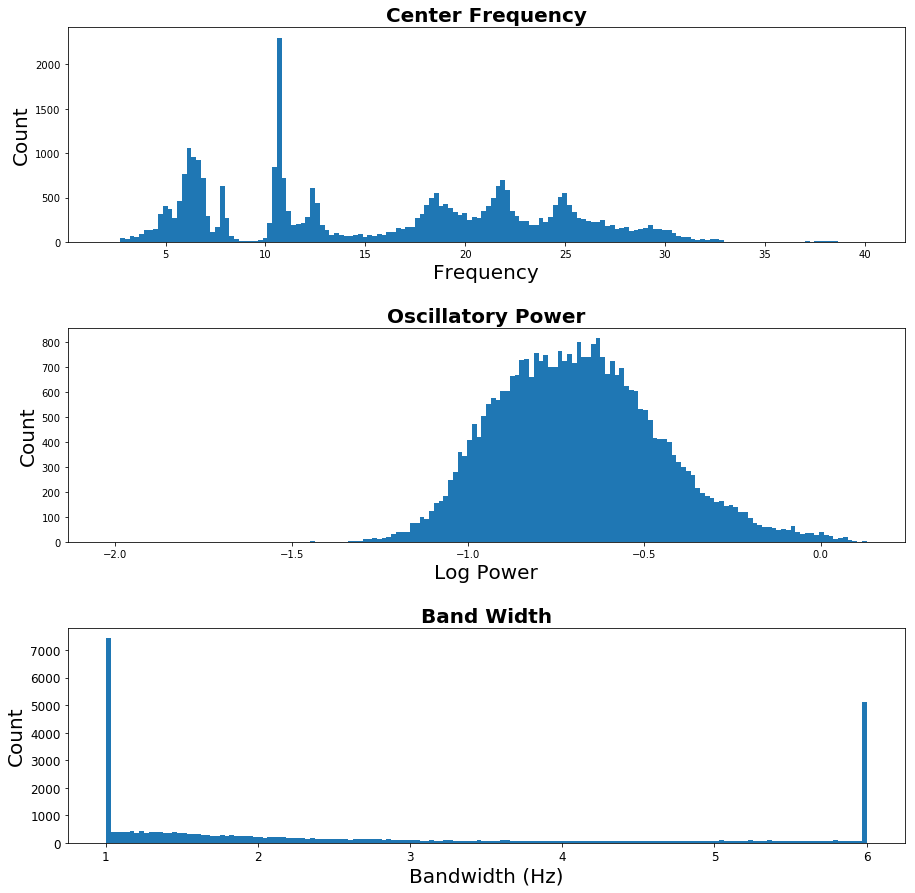

In [32]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
plot_all_oscs(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.comment)

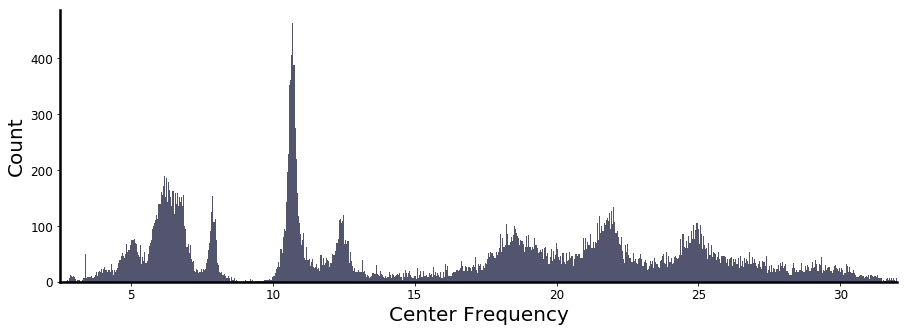

In [36]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_subj.centers_all, 0, meg_subj.comment, n_bins=1000)

In [37]:
# Calculate correlations between oscillatory parameters
rs_mat, ps_mat, labels = meg_subj.calc_osc_param_corrs()
print_corrs_mat(rs_mat, ps_mat, labels)

Corr of  Centers-Powers      is  -0.1331     with p-val of  0.00000
Corr of  Centers-Bandwidths  is  +0.4911     with p-val of  0.00000
Corr of  Powers-Bandwidths   is  -0.0293     with p-val of  0.00000


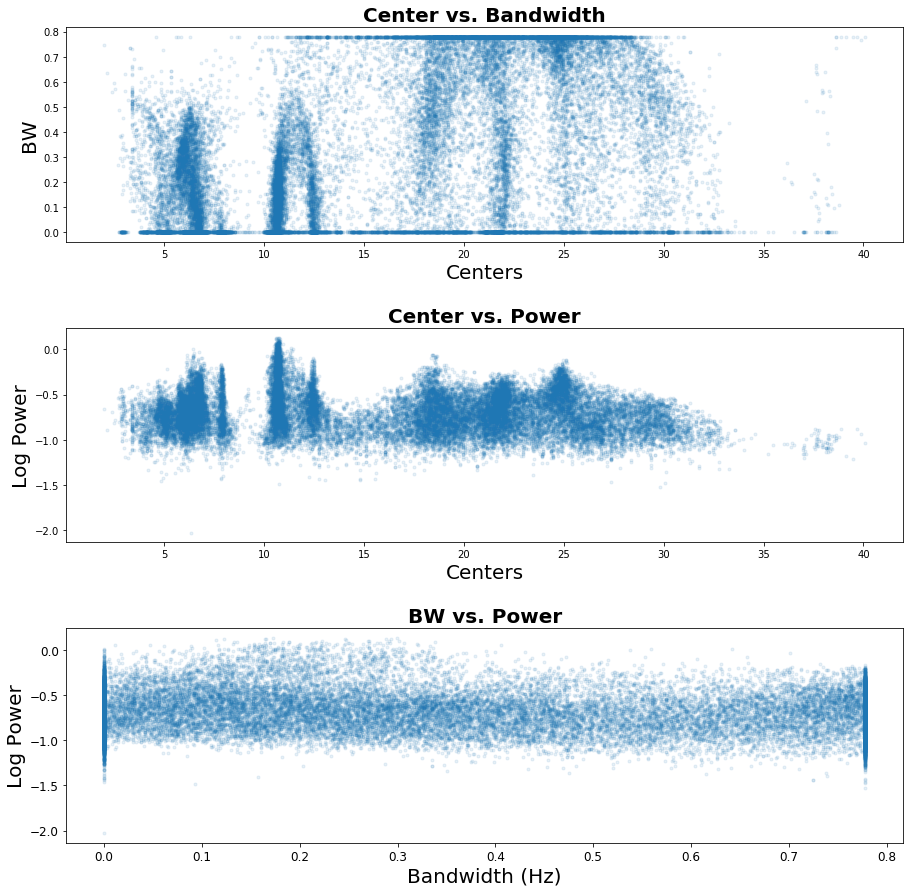

In [38]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.comment)

## Finding Peaks in CF Distribution

Find the main 'modes' of oscillations in an individual subject.

In [108]:
from scipy.signal import find_peaks

In [165]:
# Create histogram representation of  calculate the centers of each bin
vals, bins = np.histogram(meg_subj.centers_all, bins=500)
bin_cens = np.array([(a + b)/2 for a, b in zip(bins, bins[1:])])

In [166]:
# Find peaks in the histogram of center frequencies
peak_inds, peak_dict = find_peaks(vals, height=200, distance=10)

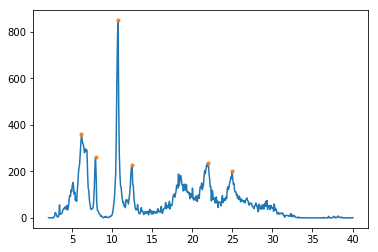

In [167]:
# Check where the peak values are
plt.plot(bin_cens, vals)
plt.plot(bin_cens[peak_inds], vals[peak_inds], '.')

In [170]:
# Check where the peaks are
print(bin_cens[peak_inds])

[  6.15569398   7.90742198  10.7254192   12.4771472   21.99740806
  24.96772945]
